In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # Disable the warning
from scipy.stats import norm
import matplotlib.ticker as ticker
%matplotlib widget

In [2]:
hits = pd.read_hdf(f"../config/ATPC_0nubb.h5", 'MC/hits')

display(hits)

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,672.491211,423.717010,300.643494,0.002031,0.010386,GAS,2,0
1,0,672.128296,424.205383,300.883972,0.004877,0.035060,GAS,2,1
2,0,671.756653,423.740173,300.823242,0.007571,0.017007,GAS,2,2
3,0,672.194763,423.518646,301.106018,0.010172,0.027088,GAS,2,3
4,0,672.520630,423.331909,301.447632,0.012586,0.019201,GAS,2,4
...,...,...,...,...,...,...,...,...,...
1956539,8932,80.965271,-471.639069,0.115173,0.022989,0.009210,GAS,1,20
1956540,8932,80.957123,-471.638702,0.114118,0.023106,0.002865,GAS,1,21
1956541,8932,80.952469,-471.635773,0.116189,0.023199,0.002965,GAS,1,22
1956542,8932,80.955132,-471.633423,0.115016,0.023268,0.006833,GAS,1,23


In [3]:
# Mean energy per e-. This splits up each G4 into E_hit/E_mean electrons
E_mean = 24.8e-6 # [eV]

# Function to smear the number of electrons in each hit by the fano factor
def smear_energy(N, resolution):
    if N < 10:
        return np.random.poisson(N)  # Poisson for small N
    else:
        # sigma = np.sqrt(N * 0.15) # 0.15 Fano factor
        if (resolution == 1):
            sigma = np.sqrt(N * 1.8) # 1% ER
        
        elif (resolution == 1.2):
            sigma = np.sqrt(N * 2.6) # 1.2% ER
        
        elif (resolution == 0.3):
            sigma = np.sqrt(N * 0.15) # 0.3% ER
        
        elif (resolution == 0.75):
            sigma = np.sqrt(N * 0.98) # 0.75% ER
        
        elif (resolution == 0.5):
            sigma = np.sqrt(N * 0.45) # 0.5% ER

        elif (resolution == 3):
            sigma = np.sqrt(N * 16.5) # 3% ER
        
        elif (resolution == 2.5):
            sigma = np.sqrt(N * 11) # 2.5% ER 
        
        elif (resolution == 2.0):
            sigma = np.sqrt(N * 7.3) # 2.0% ER 
        
        elif (resolution == 1.5):
            sigma = np.sqrt(N * 4) # 1.5% ER

        else:
            print("Error resoltion not defined, using default 1%")
            sigma = np.sqrt(N * 1.8) # 1% ER
        
        new_n = int(round(np.random.normal(N, sigma)))
        if (new_n < 0):
            return 1
        else:
            return new_n  # Apply Gauss+rounding

In [4]:
def FilterEventE(df, Emin, Emax, E_mean):

    event_energies = df.groupby("event_id").n.sum()*E_mean*1000

    passed_events = event_energies[ (event_energies >= Emin) & ((event_energies <= Emax))].index

    dfs_filtered = df[df["event_id"].isin(passed_events)]

    return dfs_filtered

In [5]:
e_sum = []

dfs = []
dfs2 = []
dfs3 = []
dfs4 = []
dfs5 = []

for index, e in enumerate(hits.event_id.unique()):
    print("On Event:", e )

    if (e > 10000):
        break

    # Select the event
    event = hits[hits.event_id == e]

    # Calc number of electrons in a hit
    event["n"] = round(event["energy"]/E_mean)
    event2 = event.copy()
    event3 = event.copy()
    event4 = event.copy()
    event5 = event.copy()
    
    # Smear the energy by Fano amount
    event["n"]  = event["n"].apply(lambda x: smear_energy(x, resolution=1))
    event2["n"] = event2["n"].apply(lambda x: smear_energy(x, resolution=1.5))
    event3["n"] = event3["n"].apply(lambda x: smear_energy(x, resolution=2.0))
    event4["n"] = event4["n"].apply(lambda x: smear_energy(x, resolution=2.5))
    event5["n"] = event5["n"].apply(lambda x: smear_energy(x, resolution=3.0))
    
    dfs.append(event)
    dfs2.append(event2)
    dfs3.append(event3)
    dfs4.append(event4)
    dfs5.append(event5)


dfs = pd.concat(dfs)
dfs2 = pd.concat(dfs2)
dfs3 = pd.concat(dfs3)
dfs4 = pd.concat(dfs4)
dfs5 = pd.concat(dfs5)
display(dfs)


On Event: 0
On Event: 1
On Event: 2
On Event: 3
On Event: 4
On Event: 5
On Event: 6
On Event: 7
On Event: 8
On Event: 9
On Event: 10
On Event: 11
On Event: 12
On Event: 13
On Event: 14
On Event: 15
On Event: 16
On Event: 17
On Event: 18
On Event: 19
On Event: 20
On Event: 21
On Event: 22
On Event: 23
On Event: 24
On Event: 25
On Event: 26
On Event: 27
On Event: 28
On Event: 29
On Event: 30
On Event: 31
On Event: 32
On Event: 33
On Event: 34
On Event: 35
On Event: 36
On Event: 37
On Event: 38
On Event: 39
On Event: 40
On Event: 41
On Event: 42
On Event: 43
On Event: 44
On Event: 45
On Event: 46
On Event: 47
On Event: 48
On Event: 49
On Event: 50
On Event: 51
On Event: 52
On Event: 53
On Event: 54
On Event: 55
On Event: 56
On Event: 57
On Event: 58
On Event: 59
On Event: 60
On Event: 61
On Event: 62
On Event: 63
On Event: 64
On Event: 65
On Event: 66
On Event: 67
On Event: 68
On Event: 69
On Event: 70
On Event: 71
On Event: 72
On Event: 73
On Event: 74
On Event: 75
On Event: 76
On Event:

,event_id,x,y,z,time,energy,label,particle_id,hit_id,n
0,0,672.491211,423.717010,300.643494,0.002031,0.010386,GAS,2,0,463
1,0,672.128296,424.205383,300.883972,0.004877,0.035060,GAS,2,1,1321
2,0,671.756653,423.740173,300.823242,0.007571,0.017007,GAS,2,2,736
3,0,672.194763,423.518646,301.106018,0.010172,0.027088,GAS,2,3,1126
4,0,672.520630,423.331909,301.447632,0.012586,0.019201,GAS,2,4,826
...,...,...,...,...,...,...,...,...,...,...
1956539,8932,80.965271,-471.639069,0.115173,0.022989,0.009210,GAS,1,20,348
1956540,8932,80.957123,-471.638702,0.114118,0.023106,0.002865,GAS,1,21,142
1956541,8932,80.952469,-471.635773,0.116189,0.023199,0.002965,GAS,1,22,143
1956542,8932,80.955132,-471.633423,0.115016,0.023268,0.006833,GAS,1,23,250


In [6]:

Eres = 3

min_E = 2458 - Eres*2458/100
max_E = 2458 + Eres*2458/100
print(min_E, max_E)

if (Eres == 1):
    filt_df = dfs
elif (Eres == 0.5):
    filt_df = dfs2
elif (Eres == 1.2):
    filt_df = dfs3
elif (Eres == 0.3):
    filt_df = dfs4
elif (Eres == 0.75):
    filt_df = dfs5

elif (Eres == 1.5):
    filt_df = dfs2
elif (Eres == 2.0):
    filt_df = dfs3
elif (Eres == 2.5):
    filt_df = dfs4
elif (Eres == 3.0):
    filt_df = dfs5


    
# filt_df = FilterEventE(dfs, min_E, max_E, E_mean)


# filt_df = pd.read_hdf("../config/ATPC_0nubb_EFilt.h5", "MC/hits5")

# event_energies = dfs.groupby("event_id").n.sum()*E_mean*1000
event_energies = filt_df.groupby("event_id").n.sum()*E_mean*1000
print(event_energies)



2384.26 2531.74
event_id
0       2448.9256
1       2546.9352
2       2466.8808
3       2458.8456
4       2487.0680
          ...    
8928    2488.0600
8929    2461.7472
8930    2473.0560
8931    2455.3984
8932    2450.3640
Name: n, Length: 8933, dtype: float64


FWMH: 75.079765473812
Eres FWMH: 3.0546043882309215


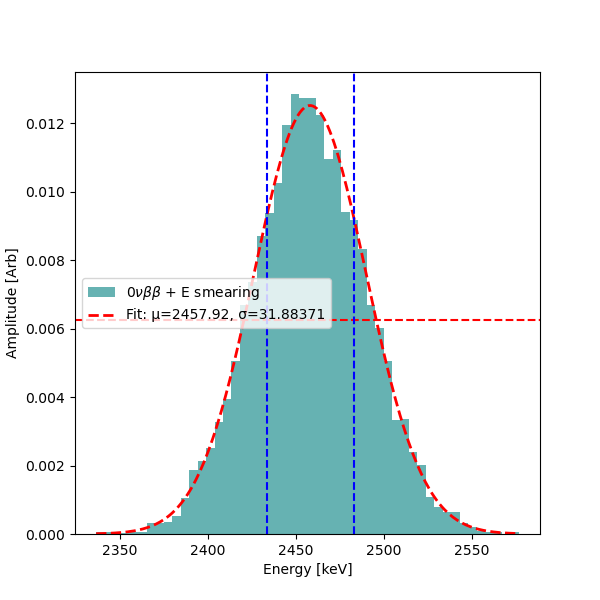

In [7]:
fig = plt.figure(figsize=(6,6));

plt.subplot(111);
# Plot histogram
counts, bins, _ = plt.hist(event_energies, bins=50, density=True, alpha=0.6, color='Teal', label=r'$0\nu\beta\beta$ + E smearing')
mu, sigma = norm.fit(event_energies)


# Plot the fitted Gaussian curve
x = np.linspace(bins[0], bins[-1], 200)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r--', linewidth=2, label=f'Fit: μ={mu:.2f}, σ={sigma:.5f}')
plt.xlabel('Energy [keV]')
plt.ylabel("Amplitude [Arb]")
plt.legend()

print("FWMH:", 2.3548*sigma)
print("Eres FWMH:", 100*2.3548*sigma/mu)

plt.axhline(y=max(pdf)/2.0, color='r', linestyle='--')

plt.axvline(x=2.43342*1000, color='b', linestyle='--')
plt.axvline(x=2.48258*1000, color='b', linestyle='--')

# plt.savefig(f"plots/Technote/ERes_0.5percent.pdf", dpi=500)


In [21]:
# Make a plot of the background acceptance vs signal efficiency
N_sig = 10000.
N_Bi  = 10.e6
N_Tl  = 1.e6
N_single = 100e3
E_mean = 24.8e-6 # [eV]

nubb_meta = pd.read_hdf("../data/Eres/ATPC_0nubb_Efilt.h5", "MC/meta")
Bi_meta = pd.read_hdf("../data/Eres/ATPC_Bi_ion_Efilt.h5", "MC/meta")
Tl_meta = pd.read_hdf("../data/Eres/ATPC_Tl_ion_Efilt.h5", "MC/meta")
single_meta = pd.read_hdf("../data/Eres/ATPC_single_Efilt.h5", "MC/meta")
radon_meta = pd.read_hdf("../data/Eres/ATPC_Bi_ion_cathode_Efilt.h5", "MC/meta")

display(nubb_meta)
display(Bi_meta)
display(Tl_meta)
display(single_meta)
display(radon_meta)


N_sig_win = int(nubb_meta.N_saved.iloc[0])
N_Bi_win  = int(Bi_meta.N_saved.iloc[0])
N_Tl_win  = int(Tl_meta.N_saved.iloc[0])
N_single_win  = int(single_meta.N_saved.iloc[0])
N_radon_win  = int(radon_meta.N_saved.iloc[0])*399
print(N_sig_win, N_Bi_win, N_Tl_win, N_radon_win)

def LoadHits(file):
    hits1 = pd.read_hdf(f"../data/Eres/{file}", "MC/hits1")
    hits2 = pd.read_hdf(f"../data/Eres/{file}", "MC/hits2")
    hits3 = pd.read_hdf(f"../data/Eres/{file}", "MC/hits3")
    hits4 = pd.read_hdf(f"../data/Eres/{file}", "MC/hits4")
    hits5 = pd.read_hdf(f"../data/Eres/{file}", "MC/hits5")

    hits1["energy"] = hits1["n"]*E_mean
    hits2["energy"] = hits2["n"]*E_mean
    hits3["energy"] = hits3["n"]*E_mean
    hits4["energy"] = hits4["n"]*E_mean
    hits5["energy"] = hits5["n"]*E_mean
    return [hits1, hits2, hits3, hits4, hits5]


# Cut out events with Brem in the name
def ApplyEnergyWindowCut(df,threshold_min, threshold_max):

    event_energy = df.groupby("event_id").energy.sum()
    good_events = event_energy[(event_energy >= threshold_min) & (event_energy <= threshold_max)].index
    df = df[df["event_id"].isin(good_events)]
    return df


def ApplyVariedEnergyThreshold(df, Eres):

    thresh_range = np.arange(1, -0.1, -0.1)

    wins = []
    for r in thresh_range:

        threshold_min = 2.458 - r * Eres*2.458/100
        threshold_max = 2.458 + Eres*2.458/100
        print(threshold_min, threshold_max)
        df = ApplyEnergyWindowCut(df,threshold_min, threshold_max)
        wins.append(len(df.event_id.unique()))

    return np.array(wins)


nubb_hits   = LoadHits("ATPC_0nubb_Efilt.h5")
Bi_hits = LoadHits("ATPC_Bi_ion_Efilt.h5")
Tl_hits = LoadHits("ATPC_Tl_ion_Efilt.h5")
single_hits = LoadHits("ATPC_single_Efilt.h5")
radon_hits = LoadHits("ATPC_Bi_ion_cathode_Efilt.h5")

Eres = [1.2, 1.0, 0.75, 0.5, 0.3]


nubb_win = []
Bi_win = []
Tl_win = []
single_win = []
radon_win = []

for index, res in enumerate(Eres):
    print("On resolution", res)
    # nubb_win.append(ApplyVariedEnergyThreshold(nubb_hits[index], res)/N_sig)
    # Bi_win.append  (0.37*ApplyVariedEnergyThreshold(Bi_hits[index], res)/N_Bi)
    # Tl_win.append  (0.37*ApplyVariedEnergyThreshold(Tl_hits[index], res)/N_Tl)
    nubb_win.append(ApplyVariedEnergyThreshold(nubb_hits[index], res)/N_sig_win)
    Bi_win.append  (ApplyVariedEnergyThreshold(Bi_hits[index], res)/N_Bi_win)
    Tl_win.append  (ApplyVariedEnergyThreshold(Tl_hits[index], res)/N_Tl_win)
    single_win.append  (ApplyVariedEnergyThreshold(single_hits[index], res)/N_single_win)
    radon_win.append  (ApplyVariedEnergyThreshold(radon_hits[index], res)/N_radon_win)


print(nubb_win[1])
print(Bi_win[3])
print(Tl_win[1])
print(single_win[1])



,N_gen,N_saved,N_savedE1,N_savedE2,N_savedE3,N_savedE4,N_savedE5,min_E,max_E,P,detsize,chamber_thick,seed,start_id
0,10000,9009,8753,8765,8742,8730,8778,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,9800,0


,N_gen,N_saved,N_savedE1,N_savedE2,N_savedE3,N_savedE4,N_savedE5,min_E,max_E,P,detsize,chamber_thick,seed,start_id
0,10000000,5465,3886,3714,3388,2568,705,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,9800,9800


,N_gen,N_saved,N_savedE1,N_savedE2,N_savedE3,N_savedE4,N_savedE5,min_E,max_E,P,detsize,chamber_thick,seed,start_id
0,1000000,10548,1861,1526,1120,751,452,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,9800,9800


,N_gen,N_saved,N_savedE1,N_savedE2,N_savedE3,N_savedE4,N_savedE5,min_E,max_E,P,detsize,chamber_thick,seed,start_id
0,100000,9628,1925,1608,1235,840,493,2.3 MeV,2.6 MeV,25 bar,2.114 m,4 cm,9800,0


,N_gen,N_saved,N_savedE1,N_savedE2,N_savedE3,N_savedE4,N_savedE5,min_E,max_E,P,detsize,chamber_thick,seed,start_id
0,250000,2405,441,362,290,173,96,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,1,250000
0,250000,2349,436,383,284,184,111,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,2,500000
0,250000,2333,436,374,277,190,113,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,11,2750000
0,250000,2473,414,358,279,190,105,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,101,25250000
0,250000,2302,406,338,252,170,106,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,102,25500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,250000,2376,435,386,279,190,110,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,96,24000000
0,250000,2369,420,358,268,174,105,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,97,24250000
0,250000,2313,416,351,266,174,102,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,98,24500000
0,250000,2373,445,378,276,197,115,2.3 MeV,2.6 MeV,25. bar,2.114 m,4 cm,99,24750000


9009 5465 10548 959595
On resolution 1.2
2.428504 2.487496
2.4314536 2.487496
2.4344032 2.487496
2.4373528 2.487496
2.4403024 2.487496
2.443252 2.487496
2.4462016 2.487496
2.4491512 2.487496
2.4521008 2.487496
2.4550504 2.487496
2.458 2.487496
2.428504 2.487496
2.4314536 2.487496
2.4344032 2.487496
2.4373528 2.487496
2.4403024 2.487496
2.443252 2.487496
2.4462016 2.487496
2.4491512 2.487496
2.4521008 2.487496
2.4550504 2.487496
2.458 2.487496
2.428504 2.487496
2.4314536 2.487496
2.4344032 2.487496
2.4373528 2.487496
2.4403024 2.487496
2.443252 2.487496
2.4462016 2.487496
2.4491512 2.487496
2.4521008 2.487496
2.4550504 2.487496
2.458 2.487496
2.428504 2.487496
2.4314536 2.487496
2.4344032 2.487496
2.4373528 2.487496
2.4403024 2.487496
2.443252 2.487496
2.4462016 2.487496
2.4491512 2.487496
2.4521008 2.487496
2.4550504 2.487496
2.458 2.487496
2.428504 2.487496
2.4314536 2.487496
2.4344032 2.487496
2.4373528 2.487496
2.4403024 2.487496
2.443252 2.487496
2.4462016 2.487496
2.4491512 2.4874

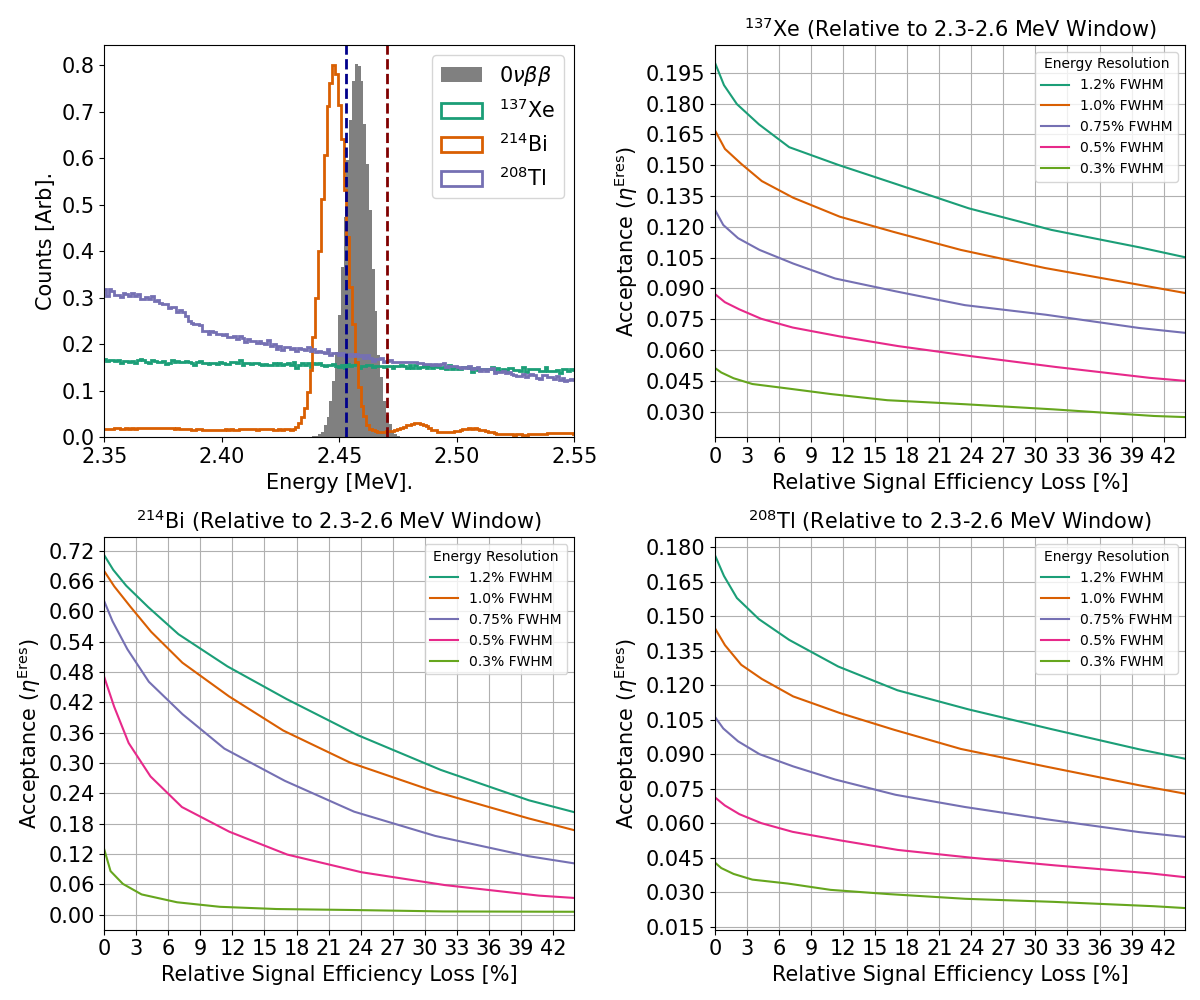

In [32]:
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=plt.cm.Dark2.colors)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for index, res in enumerate(Eres):
    ax[1,0].plot(nubb_win[index][0]*100 - nubb_win[index]*100, Bi_win[index], label = f"{res}% FWHM")
    ax[1,1].plot(nubb_win[index][0]*100 - nubb_win[index]*100, Tl_win[index], label = f"{res}% FWHM")
    ax[0,1].plot(nubb_win[index][0]*100 - nubb_win[index]*100, single_win[index], label = f"{res}% FWHM")

ax[1,0].set_title("$^{214}$Bi (Relative to 2.3-2.6 MeV Window)", fontsize=15)
ax[1,0].set_xlabel("Relative Signal Efficiency Loss [%]", fontsize=15)
ax[1,0].set_ylabel(r"Acceptance ($\eta^{\mathrm{Eres}}$)", fontsize=15)
ax[1,0].tick_params(axis='both', which='both', labelsize=15)
ax[1,0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax[1,0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax[1,0].legend(title = "Energy Resolution")
ax[1,0].grid()
ax[1,0].set_xlim(0,44)

ax[1,1].set_title("$^{208}$Tl (Relative to 2.3-2.6 MeV Window)", fontsize=15)
ax[1,1].set_xlabel("Relative Signal Efficiency Loss [%]", fontsize=15)
ax[1,1].set_ylabel(r"Acceptance ($\eta^{\mathrm{Eres}}$)", fontsize=15)
ax[1,1].tick_params(axis='both', which='both', labelsize=15)
ax[1,1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax[1,1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax[1,1].legend(title = "Energy Resolution")
ax[1,1].grid()
ax[1,1].set_xlim(0,44)

ax[0,1].set_title("$^{137}$Xe (Relative to 2.3-2.6 MeV Window)", fontsize=15)
ax[0,1].set_xlabel("Relative Signal Efficiency Loss [%]", fontsize=15)
ax[0,1].set_ylabel(r"Acceptance ($\eta^{\mathrm{Eres}}$)", fontsize=15)
ax[0,1].tick_params(axis='both', which='both', labelsize=15)
ax[0,1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax[0,1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax[0,1].legend(title = "Energy Resolution")
ax[0,1].grid()
ax[0,1].set_xlim(0,44)
plt.tight_layout()

# Load in the files with larger window with 0.5% ERes

nubb_csv = pd.read_csv("../data/Eres/0nubb.csv")
single_csv = pd.read_csv("../data/Eres/single.csv")
Bi_ion_csv = pd.read_csv("../data/Eres/Bi_ion.csv")
Tl_ion_csv = pd.read_csv("../data/Eres/Tl_ion.csv")

# display(nubb_csv)
w1 = np.ones_like(nubb_csv["Energies"])/30000
w2 = np.ones_like(single_csv["Energies"])/30000
w3 = np.ones_like(Bi_ion_csv["Energies"])/40000
w4 = np.ones_like(Tl_ion_csv["Energies"])/30000

ax[0,0].hist(nubb_csv["Energies"], bins = np.linspace(2.3,2.6,250),   weights= w1, linewidth=2,color="grey", label = r"$0\nu\beta\beta$");
ax[0,0].hist(single_csv["Energies"], bins = np.linspace(2.3,2.6,250), weights= w2, histtype = "step",linewidth=2, label = "$^{137}$Xe");
ax[0,0].hist(Bi_ion_csv["Energies"], bins = np.linspace(2.3,2.6,250), weights= w3, histtype = "step",linewidth=2, label = "$^{214}$Bi");
ax[0,0].hist(Tl_ion_csv["Energies"], bins = np.linspace(2.3,2.6,250), weights= w4, histtype = "step",linewidth=2, label = "$^{208}$Tl");
ax[0,0].legend(fontsize=15)
ax[0,0].set_ylabel("Counts [Arb].", fontsize=15)
ax[0,0].set_xlabel("Energy [MeV].", fontsize=15)
ax[0,0].tick_params(axis='both', which='both', labelsize=15)

# ax[0,0].axvline(x = 2.4456702, color = 'DarkBlue', linestyle="--", linewidth=2)
ax[0,0].axvline(x = 2.453, color = 'DarkBlue', linestyle="--", linewidth=2)
ax[0,0].axvline(x = 2.4702498, color = 'Maroon', linestyle="--", linewidth=2)
ax[0,0].set_xlim(2.35,2.55)
plt.tight_layout()


# Hide the unused subplot
# ax[1,1].axis('off')

plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/EnergyResolution.pdf")

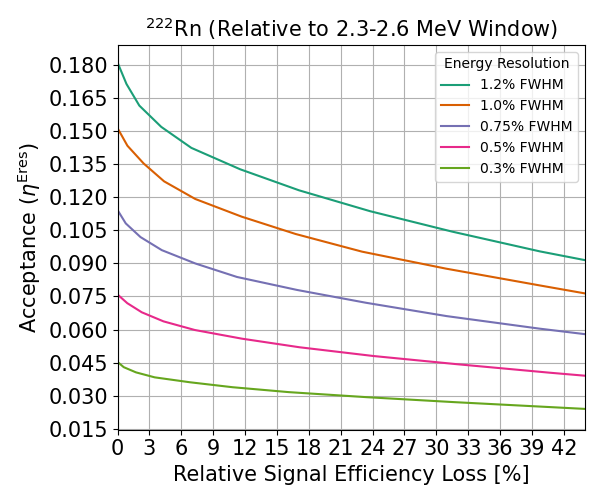

In [31]:
# Make plot of radon

# fig, ax = plt.subplots(1, 1, figsize=(12, 5))
fig, ax = plt.subplots( figsize=(6, 5))

Rn_csv = pd.read_csv("../data/Eres/Bi_ion_cathode.csv")
w5 = np.ones_like(Rn_csv["Energies"])/30000

# ax[0].hist(nubb_csv["Energies"], bins = np.linspace(2.3,2.6,250),   weights= w1, linewidth=2,color="grey", label = r"$0\nu\beta\beta$");
# ax[0].hist(Rn_csv["Energies"], bins = np.linspace(2.3,2.6,250), weights= w5, histtype = "step",linewidth=2, label = "Radon");
# ax[0].legend(fontsize=15)
# ax[0].set_ylabel("Counts [Arb].", fontsize=15)
# ax[0].set_xlabel("Energy [MeV].", fontsize=15)
# ax[0].tick_params(axis='both', which='both', labelsize=15)

# ax[0].axvline(x = 2.4456702, color = 'DarkBlue', linestyle="--", linewidth=2)
# ax[0].axvline(x = 2.4702498, color = 'Maroon', linestyle="--", linewidth=2)
# ax[0].set_xlim(2.35,2.55)


for index, res in enumerate(Eres):
    ax.plot(nubb_win[index][0]*100 - nubb_win[index]*100, radon_win[index], label = f"{res}% FWHM")

ax.set_title(r"$^{222}$Rn (Relative to 2.3-2.6 MeV Window)", fontsize=15)
ax.set_xlabel("Relative Signal Efficiency Loss [%]", fontsize=15)
ax.set_ylabel(r"Acceptance ($\eta^{\mathrm{Eres}}$)", fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=15)
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax.legend(title = "Energy Resolution")
ax.grid()
ax.set_xlim(0,44)

plt.tight_layout()

plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/EnergyResolutionRadon.pdf")

In [25]:
# Lets derive some correction factors for analysis
# [ERes, cut size]

nubb_corr = nubb_win[2][6]/nubb_win[1][0]
# print(nubb_corr)

# Background rejection factors are relative to 1% FWHM at 0% eff loss

Bi_corr = Bi_win[2][6]/Bi_win[1][0]
Tl_corr = Tl_win[2][6]/Tl_win[1][0]
single_corr = single_win[2][6]/single_win[1][0]
# print(Bi_corr, Tl_corr, single_corr)


print(Bi_win[0][6], Tl_win[0][6], single_win[0][6], radon_win[0][6]) # 1.2%
print(Bi_win[1][6], Tl_win[1][6], single_win[1][6], radon_win[1][6]) # 1%
print(Bi_win[2][6], Tl_win[2][6], single_win[2][6], radon_win[2][6]) # 0.75%
print(Bi_win[3][6], Tl_win[3][6], single_win[3][6], radon_win[3][6]) # 0.5%
print(Bi_win[4][6], Tl_win[4][6], single_win[4][6], radon_win[4][6]) # 0.3%



0.4263494967978042 0.11774744027303755 0.14063149148317408 0.12323219691640744
0.36413540713632203 0.10058778915434205 0.11746987951807229 0.10338945075787181
0.264775846294602 0.0723359878649981 0.08859576235978396 0.07797352007878323
0.11875571820677036 0.04835039817974972 0.06190278354798504 0.0519364940417572
0.010978956999085087 0.0291998483124763 0.035521395928541755 0.03155081049817892


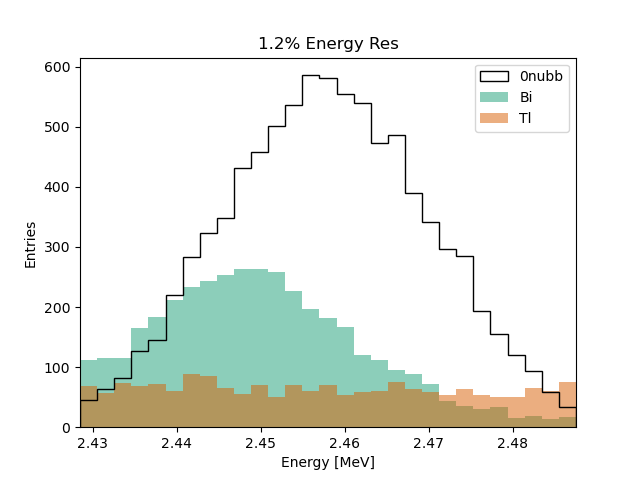

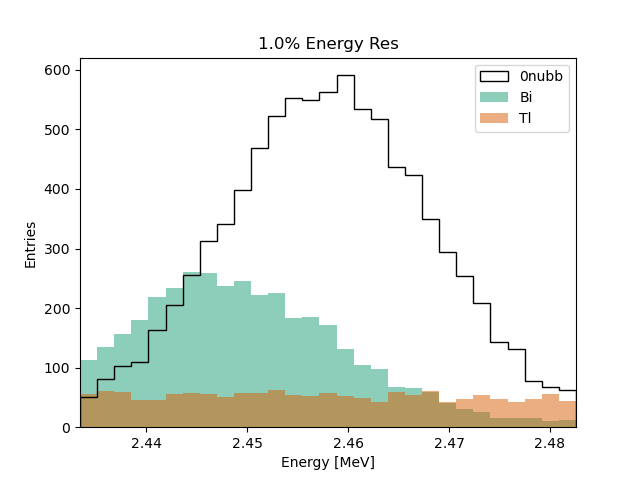

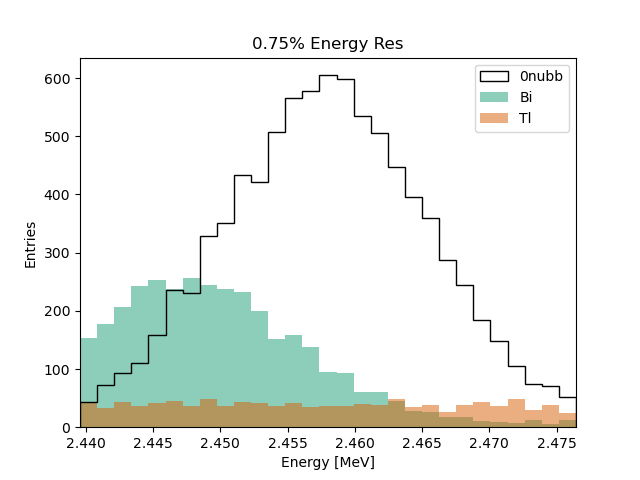

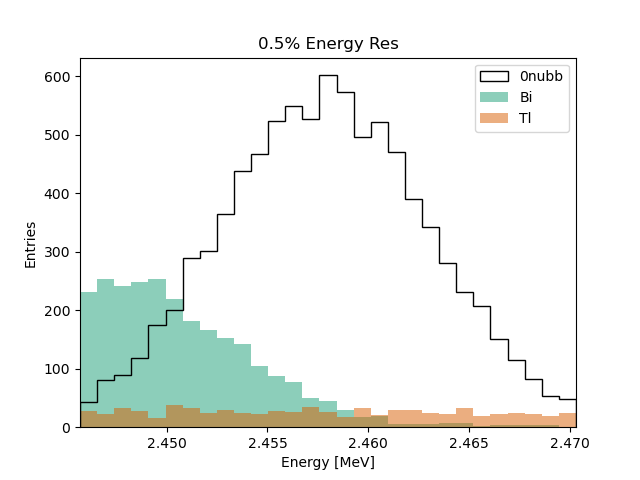

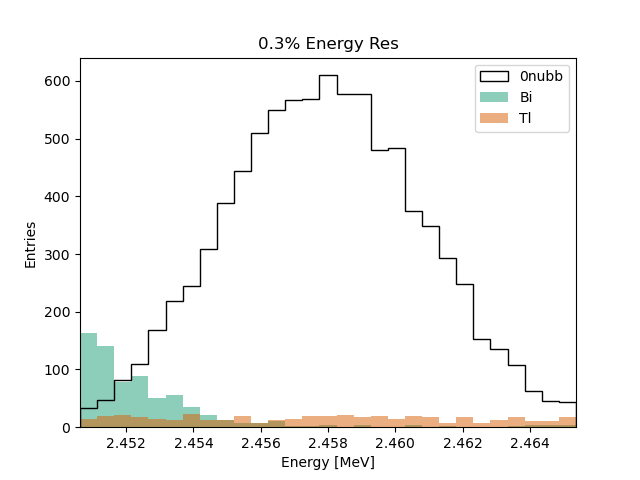

In [11]:
def ApplyVariedEnergyThresholdDF(df, Eres):

    threshold_min = 2.458 - Eres*2.458/100
    threshold_max = 2.458 + Eres*2.458/100
    df = ApplyEnergyWindowCut(df,threshold_min, threshold_max)

    return df
Eres = [1.2, 1.0, 0.75, 0.5, 0.3]
for index, Eres in enumerate(Eres):
    # Eres = 1

    if (Eres == 1.2):
        nubb_filt = ApplyVariedEnergyThresholdDF(nubb_hits[0], 1.2)
        Bi_filt   = ApplyVariedEnergyThresholdDF(Bi_hits[0], 1.2)
        Tl_filt   = ApplyVariedEnergyThresholdDF(Tl_hits[0], 1.2)
    elif (Eres == 1):
        nubb_filt = ApplyVariedEnergyThresholdDF(nubb_hits[1], 1)
        Bi_filt   = ApplyVariedEnergyThresholdDF(Bi_hits[1], 1)
        Tl_filt   = ApplyVariedEnergyThresholdDF(Tl_hits[1], 1)
    elif (Eres == 0.75):
        nubb_filt = ApplyVariedEnergyThresholdDF(nubb_hits[2], 0.75)
        Bi_filt   = ApplyVariedEnergyThresholdDF(Bi_hits[2], 0.75)
        Tl_filt   = ApplyVariedEnergyThresholdDF(Tl_hits[2], 0.75)
    elif (Eres == 0.5):
        nubb_filt = ApplyVariedEnergyThresholdDF(nubb_hits[3], 0.5)
        Bi_filt   = ApplyVariedEnergyThresholdDF(Bi_hits[3], 0.5)
        Tl_filt   = ApplyVariedEnergyThresholdDF(Tl_hits[3], 0.5)
    elif (Eres == 0.3):
        nubb_filt = ApplyVariedEnergyThresholdDF(nubb_hits[4], 0.3)
        Bi_filt   = ApplyVariedEnergyThresholdDF(Bi_hits[4], 0.3)
        Tl_filt   = ApplyVariedEnergyThresholdDF(Tl_hits[4], 0.3)

    plt.figure()
    Emin = 2.458 - Eres*2.458/100
    Emax = 2.458 + Eres*2.458/100
    plt.hist(nubb_filt.groupby("event_id").energy.sum(), bins = np.linspace(Emin,Emax,30), histtype = "step", label = "0nubb", color = "k");
    plt.hist(Bi_filt.groupby("event_id").energy.sum(), bins = np.linspace(Emin,Emax,30), alpha = 0.5, label = "Bi");
    plt.hist(Tl_filt.groupby("event_id").energy.sum(), bins = np.linspace(Emin,Emax,30), alpha = 0.5, label = "Tl");
    plt.xlabel("Energy [MeV]")
    plt.ylabel("Entries")
    plt.title(f"{Eres}% Energy Res")
    plt.xlim(Emin, Emax)

    plt.legend()

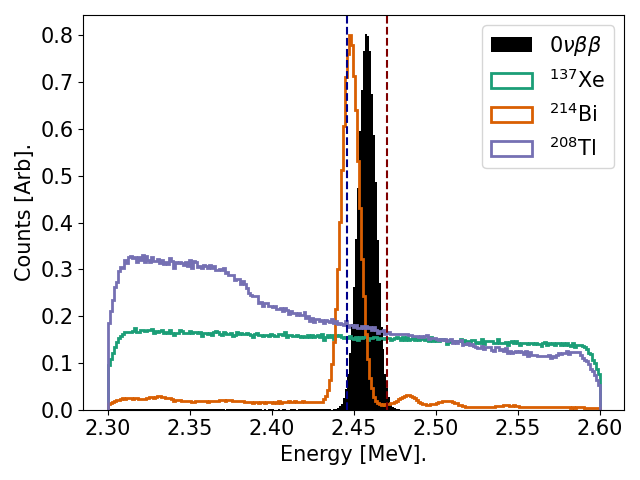

In [12]:
# Load in the files with larger window with 0.5% ERes

nubb_csv = pd.read_csv("../data/Eres/0nubb.csv")
single_csv = pd.read_csv("../data/Eres/single.csv")
Bi_ion_csv = pd.read_csv("../data/Eres/Bi_ion.csv")
Tl_ion_csv = pd.read_csv("../data/Eres/Tl_ion.csv")

# display(nubb_csv)

plt.figure()

w1 = np.ones_like(nubb_csv["Energies"])/30000
w2 = np.ones_like(single_csv["Energies"])/30000
w3 = np.ones_like(Bi_ion_csv["Energies"])/40000
w4 = np.ones_like(Tl_ion_csv["Energies"])/30000

plt.hist(nubb_csv["Energies"], bins = np.linspace(2.3,2.6,250),   weights= w1, linewidth=2,color="k", label = r"$0\nu\beta\beta$");
plt.hist(single_csv["Energies"], bins = np.linspace(2.3,2.6,250), weights= w2, histtype = "step",linewidth=2, label = "$^{137}$Xe");
plt.hist(Bi_ion_csv["Energies"], bins = np.linspace(2.3,2.6,250), weights= w3, histtype = "step",linewidth=2, label = "$^{214}$Bi");
plt.hist(Tl_ion_csv["Energies"], bins = np.linspace(2.3,2.6,250), weights= w4, histtype = "step",linewidth=2, label = "$^{208}$Tl");
plt.legend(fontsize=15)
plt.ylabel("Counts [Arb].", fontsize=15)
plt.xlabel("Energy [MeV].", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)

plt.axvline(x = 2.4456702, color = 'DarkBlue', linestyle="--")
plt.axvline(x = 2.4702498, color = 'Maroon', linestyle="--")
plt.tight_layout()


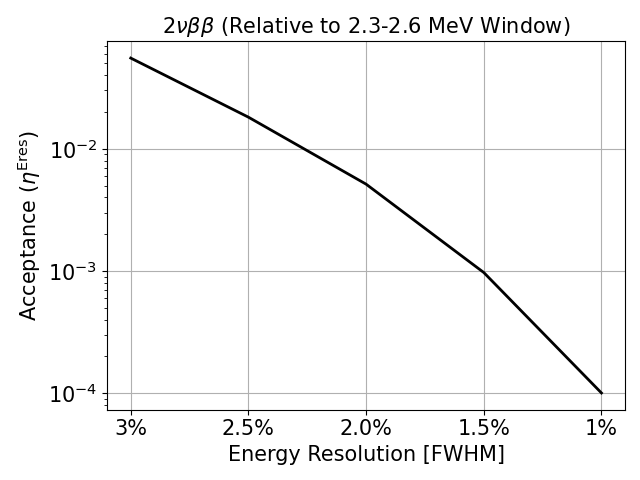

In [13]:
# make a plot of the 2nubb acceptance factors
twonubb = pd.DataFrame({'N_gen': [89790000000],'N_saved': [349442], 'N_savedE1': [19311], 'N_savedE2': [6339], 'N_savedE3': [1793], 'N_savedE4': [339], 'N_savedE5': [35]})
eres_accept = np.array([twonubb.N_savedE1.iloc[0], twonubb.N_savedE2.iloc[0], twonubb.N_savedE3.iloc[0], twonubb.N_savedE4.iloc[0],twonubb.N_savedE5.iloc[0]])/twonubb.N_saved.iloc[0]

labels = ["3%", "2.5%", "2.0%", "1.5%", "1%"]
plt.figure()
plt.plot(labels, eres_accept, c="k", linewidth=2)
plt.ylabel(r"Acceptance ($\eta^{\mathrm{Eres}}$)", fontsize=15)
plt.xlabel("Energy Resolution [FWHM]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.title(r"$2\nu\beta\beta$ (Relative to 2.3-2.6 MeV Window)", fontsize=15)
plt.grid()
plt.semilogy()
plt.tight_layout()
